In [1]:
import os
import tensorflow as tf
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score


In [2]:
# Load the saved model
model_path = 'decay_new_30epoch_binary_classification_VGG16.keras'
model = tf.keras.models.load_model(model_path)

In [3]:
# Test data paths
test_image_folder = '/Users/goutham/Updated/Final_dataset/17k_test_images/classified_test_images/12_18_test_images'  # Test images path
test_txt_folder = '/Users/goutham/Updated/Final_dataset/17k_test_images/classified_test_images/12_18_test_labels'    # Test labels path


In [4]:
# Prepare lists for test image paths and labels
test_image_paths = []
test_labels = []


In [5]:
# Load test image paths and labels
for txt_file in os.listdir(test_txt_folder):
    if txt_file.endswith('.txt'):
        with open(os.path.join(test_txt_folder, txt_file), 'r') as file:
            label = int(file.read().strip())
            image_name = os.path.splitext(txt_file)[0] + '.jpg'  # Assuming test images are in .jpg format
            image_path = os.path.join(test_image_folder, image_name)
            if os.path.exists(image_path):
                test_image_paths.append(image_path)
                test_labels.append(label)


In [6]:
# Check if there are any test images
if len(test_image_paths) == 0:
    print("No test images found. Please check the test_image_folder path and ensure files are available.")
else:
    # Prepare test images array
    X_test = []
    for path in test_image_paths:
        image = tf.keras.preprocessing.image.load_img(path, target_size=(64, 64))
        image = tf.keras.preprocessing.image.img_to_array(image) / 255.0
        X_test.append(image)
    X_test = np.array(X_test)
    y_test = np.array(test_labels)

    # Check the shape of X_test
    print(f'Shape of X_test: {X_test.shape}')  # Should be (num_samples, height, width, channels)

    # Predict only if X_test has data
    if X_test.shape[0] > 0:
        y_pred_prob = model.predict(X_test)
        y_pred = (y_pred_prob > 0.5).astype(int).flatten()

        # Calculate metrics
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        #roc_auc = roc_auc_score(y_test, y_pred_prob)

        # Print metrics
        print(f'Accuracy: {accuracy:.4f}')
        print(f'Precision: {precision:.4f}')
        print(f'Recall: {recall:.4f}')
        print(f'F1 Score: {f1:.4f}')
        #print(f'ROC AUC Score: {roc_auc:.4f}')
    else:
        print("X_test is empty, no predictions can be made.")

Shape of X_test: (7000, 64, 64, 3)
219/219 ━━━━━━━━━━━━━━━━━━━━ 58s 266ms/step
Accuracy: 0.9797
Precision: 1.0000
Recall: 0.9797
F1 Score: 0.9898


219/219 ━━━━━━━━━━━━━━━━━━━━ 60s 272ms/step


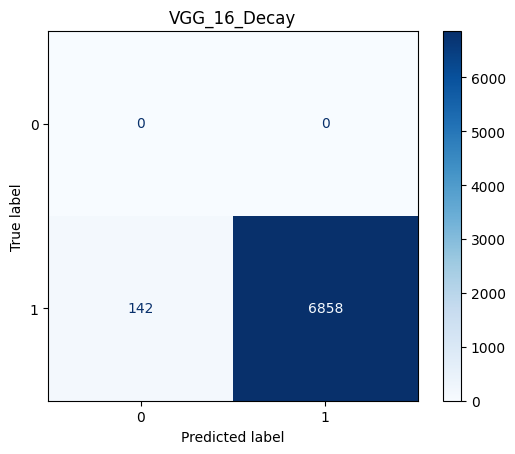

Accuracy: 0.9797
Precision: 1.0000
Recall: 0.9797
F1 Score: 0.9898


In [7]:
import numpy as np
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import matplotlib.pyplot as plt

# Load your .keras model
model = load_model('decay_new_30epoch_binary_classification_VGG16.keras')

# Predict on the test set (for binary classification)
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int).flatten()  # Threshold at 0.5 to get binary predictions (0 or 1)

# Ensure that y_test is in the correct format (single dimension with 0 and 1 labels)
y_true = y_test if y_test.ndim == 1 else np.argmax(y_test, axis=1)

# Compute the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("VGG_16_Decay")
plt.show()

# Calculate and print additional performance metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)
#roc_auc = roc_auc_score(y_true, y_pred_prob)

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
#print(f'ROC AUC Score: {roc_auc:.4f}')